In [4]:
%matplotlib notebook
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("new_train.csv", header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10480 entries, 0 to 10479
Data columns (total 18 columns):
Homepage              10466 non-null float64
Homepage _Duration    10466 non-null float64
Aboutus               10466 non-null float64
Aboutus_Duration      10466 non-null float64
Contactus             10466 non-null float64
Contactus_Duration    10466 non-null float64
BounceRates           10466 non-null float64
ExitRates             10466 non-null float64
PageValues            10480 non-null float64
SpecialDay            10480 non-null float64
Month                 10480 non-null int64
OperatingSystems      10480 non-null int64
Browser               10480 non-null int64
Province              10480 non-null int64
TrafficType           10480 non-null int64
VisitorType           10480 non-null int64
Weekend               10480 non-null int64
Revenue               10480 non-null int64
dtypes: float64(10), int64(8)
memory usage: 1.4 MB


In [6]:
df=df.dropna()

In [20]:

a=['Homepage', 'Homepage _Duration', 'Aboutus', 'Aboutus_Duration',
       'Contactus', 'Contactus_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Province', 'TrafficType', 'VisitorType', 'Weekend']

X = df[a]
y = df['Revenue']
y.shape

(10466,)

In [21]:
from sklearn import preprocessing
X = preprocessing.scale(X)

In [22]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2)

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2

In [36]:
model = Sequential()
model.add(Dense(128, activation="relu", input_shape = (x_train.shape[1],))) # Hidden Layer 1 that receives the Input from the Input Layer

model.add(Dense(64, kernel_regularizer=l2(0.001),bias_regularizer=l2(0.01), activation="relu")) # Hidden Layer 2
model.add(Dropout(0.2))

model.add(Dense(32, kernel_regularizer=l2(0.001),bias_regularizer=l2(0.01) ,activation="relu")) # Hidden Layer 3
model.add(Dropout(0.2))

# model.add(Dense(16, kernel_regularizer=l2(0.001),bias_regularizer=l2(0.01),activation="relu")) # Hidden Layer 4
# # model.add(Dropout(0.2))


model.add(Dense(1, activation="relu")) # Outout Layer

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               2304      
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='adam', loss = "binary_crossentropy", metrics = ['accuracy'])

In [43]:
history=model.fit(x_train, y_train,validation_split=0.33, batch_size = 64, epochs = 36)

Train on 5609 samples, validate on 2763 samples
Epoch 1/36
5609/5609 [==============================] - 0s 29us/step - loss: 0.3856 - acc: 0.8846 - val_loss: 0.3711 - val_acc: 0.8856
Epoch 2/36
5609/5609 [==============================] - 0s 25us/step - loss: 0.3752 - acc: 0.8857 - val_loss: 0.3642 - val_acc: 0.8831
Epoch 3/36
5609/5609 [==============================] - 0s 23us/step - loss: 0.3726 - acc: 0.8875 - val_loss: 0.3659 - val_acc: 0.8856
Epoch 4/36
5609/5609 [==============================] - 0s 22us/step - loss: 0.3728 - acc: 0.8875 - val_loss: 0.3539 - val_acc: 0.8903
Epoch 5/36
5609/5609 [==============================] - 0s 23us/step - loss: 0.3703 - acc: 0.8852 - val_loss: 0.3750 - val_acc: 0.8806
Epoch 6/36
5609/5609 [==============================] - 0s 24us/step - loss: 0.3641 - acc: 0.8891 - val_loss: 0.3530 - val_acc: 0.8903
Epoch 7/36
5609/5609 [==============================] - 0s 22us/step - loss: 0.3607 - acc: 0.8946 - val_loss: 0.3539 - val_acc: 0.8882
Epoch 8

In [44]:
test_loss, test_acc = model.evaluate(x_validation, y_validation)

2094/2094 [==============================] - 0s 13us/step


In [45]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8863419293218721


In [46]:
print('Test lost:', test_loss)

Test lost: 0.3460059647217976


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<IPython.core.display.Javascript object>


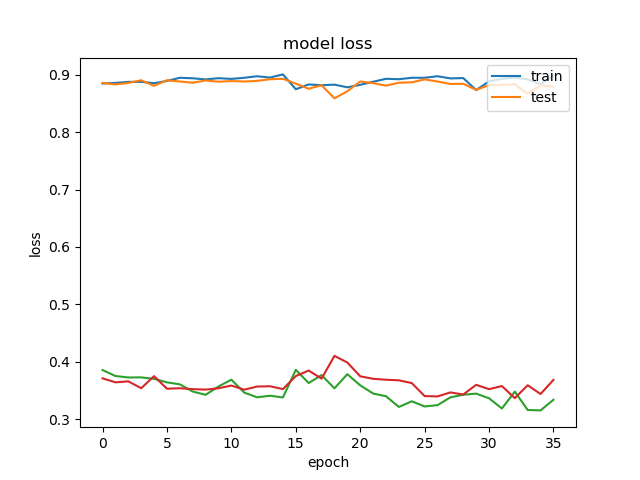

In [47]:
print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()